# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
В данной работе требуется изучить рынок российского кинопроката и выявить текущие тренды. Также отдельно рассмотрим информацию по фильмам, которые получили государственную поддержку и попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.

 Данные для анализа взяты с портала открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта Кинопоиск.

## Загрузка данных

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_movies = pd.read_csv('***')
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

В таблице 15 столбцов, типы данных - float64 и object. Большое число пропусков в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`.

Согласно документации к данным:

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.


In [4]:
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
df_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
В таблице 2 столбца, пропуски отсутвуют. 
Типы данных - float64 и int.

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.


Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies`  вошли в получившийся новый датафрейм.

Для этого сначала приведем данные в столбце `puNumber` из df_shows к строковому типу:

In [6]:
df_shows['puNumber'] = df_shows['puNumber'].astype('str')
df_movies['puNumber'] = df_movies['puNumber'].astype('str')

In [7]:
df = df_movies.merge(df_shows, on='puNumber', how='outer') # соединяем таблицы по общему столбцу puNumber

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Итак, мы получили датасет `df`, объединяющий два исходных датасета, в который попали все 3158 строк из датасета `df_shows`.


Видим некоторое количество пропусков в столбцах `director`, `producer`, `film_studio`, `ratings`, `genres` и значительное количетсво пропусков в `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, `box_office`

## Предобработка данных

### Проверка типов данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

Для возможности работы с датой преобразуем столбец `show_start_date` в формат datetime:

In [9]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Далее преобразуем данные в столбце `ratings` к вещественному формату:

In [10]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce') #  некорректные значения принудительно заменяются на NaN

### Изучение пропусков в датафрейме

- Объясним, почему заполнили пропуски определённым образом или почему не стали этого делать.

Постмотрим общее количество пропусков по столбцам:

In [11]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

Пропуски в полях о жанре фильма, режиссере и источнике финансирования мы не можем заполнить, поэтому заполним их значением `unknown`, чтобы не потрять данные:

In [12]:
df['director'] = df['director'].fillna('unknown')
df['genres'] = df['genres'].fillna('unknown')
df['financing_source'] = df['financing_source'].fillna('unknown')

Cтолбцы `producer`, `film_studio`, `production_country` оставим без измениний - он не пригодится в дальнейшем исследовании.

В столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` всего по 332 значения. Видимо, это все фильмы, получившие поддержу от государства, значит у остальных значение будет нулевым, можно оставить как пропуск.

В стоблце `box_office` пока оставим отсутсвующие значения, их слишком много, и их замена на медиану либо ноль может привести к искажению данных.

### Изучение дубликатов в датафрейме
- Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

Проверим, есть ли в данных полные дубликаты:

In [13]:
df.duplicated().sum()

0

Нам известно, что у одного фильма может быть несколько прокатных удостоверений, значит в таблице некoторые фильмы представлены по нескольку раз:

In [14]:
df['title'].duplicated().sum()

714

Также посморим дубликаты в столбце с прокатными удостоверениями:

In [15]:
df['puNumber'].duplicated().sum()
df['puNumber'][df['puNumber'].duplicated()].head()

4639    221154310
5068    221054410
Name: puNumber, dtype: object

Избавимся от этих дубликатов:

In [16]:
df = df.drop_duplicates(subset=['title'])
df = df.drop_duplicates(subset=['puNumber'])
df['title'].duplicated().sum()
df['puNumber'].duplicated().sum()

0

### Изучение категориальных значений

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.


Посмотрим на значения в категориальных столбцах `title`, `type`, `film_studio`, `director`, `production_country`, `age_restriction`, `financing_source`, `producer` и `genres`:

In [17]:
df['title'].sort_values().unique()

array([' Я ПРЕПОД', '"SOS" над тайгой', '"V" значит вендетта', ...,
       'Ярость / Fury',
       'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"',
       'сНежное шоу'], dtype=object)

In [18]:
df['type'].sort_values().unique()

array([' Анимационный', ' Художественный', 'Анимационный',
       'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

In [19]:
df['film_studio'].sort_values().unique()

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ...,
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс', nan], dtype=object)

In [20]:
df['director'].sort_values().unique()

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Пьера Лакотта по Филиппу Тальони',
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона'],
      dtype=object)

In [21]:
df['production_country'].sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

In [22]:
df['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [23]:
df['financing_source'].sort_values().unique()


array(['unknown', 'Министерство культуры',
       'Министерство культуры, Фонд кино', 'Фонд кино'], dtype=object)

In [24]:
df['producer'].sort_values().unique()


array([' А.Шальопа', ' Г.Шпригов',
       ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
       ..., 'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез', nan], dtype=object)

In [25]:
df['genres'].sort_values().unique()

array(['unknown', 'аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', '

Во всех столбцах присутствуют схожие проблемы - большое количество неявных дубликатов из-за записи в разных регистрах, лишних пробелов в начале строки, различной транслитерации иностранных слов. Также в каждой ячейке присутсвует несколько значений, которые затрудняют категоризацию. Например, жанр фильма "боевик, военный" или "военный, боевик" - по сути, это одна категория, но в итоговом анализе будет учитываться как разные жанры. Так же и в столбце со страной производства `production_country`, где указано сразу несколько стран. Такая проблема встречается  в столбцах  `genres`, `producer`, `director`, `film_studio`, `financing_source`, `production_country`.

C помощью метода `.str.strip` исправим некоторые проблемные значения:

In [26]:
df['type'] = df['type'].str.strip()
df['title'] = df['title'].str.strip().str.lower()
df['film_studio'] = df['film_studio'].str.strip().str.lower()
df['director'] = df['director'].str.strip().str.lower()
df['producer'] = df['producer'].str.strip().str.lower()


df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

### Проверка количественных значений

- Проверим, обнаружились ли в таких столбцах подозрительные данные.


Посмотрим на столбец с прибылью - `box_office`:

In [27]:
df['box_office'].describe()

count    3.017000e+03
mean     7.563248e+07
std      2.377011e+08
min      0.000000e+00
25%      1.163600e+05
50%      2.428366e+06
75%      2.372154e+07
max      3.073569e+09
Name: box_office, dtype: float64

Видим как нулевые значения, так и слишком малые. Маловероятно, что прибыль с проката фильма составила 40 или 50 рублей. 

Теперь посмотрим на гистограмму:

Text(0, 0.5, 'Число фильмов')

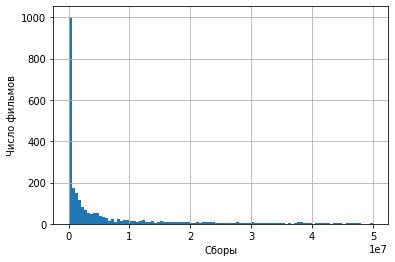

In [28]:
df['box_office'].hist(bins=100, range=(0, 50000000))
plt.xlabel('Сборы')
plt.ylabel('Число фильмов')

Видим большой пик около нуля, небольшой пик в районе 50 млн, далее гистограмма постепено сливается с нулём.

Рассмотрим поближе малые значения:

Text(0, 0.5, 'Число фильмов')

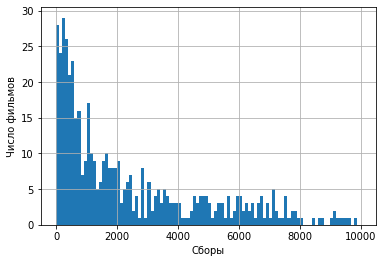

In [29]:
df['box_office'].hist(bins=100, range=(0, 10000))
plt.xlabel('Сборы')
plt.ylabel('Число фильмов')

Видим больше количество значений до 1000. Как правило, сборы фильмов исчисляются миллионами рублей, поэтому можно сделать вывод, что в данных присутствует некорректная запись - возможно "40" здесь означает "40 млн". К сожалению, без уточнения у источника, мы не можем преобразовать эти данные, и их доля - 17% - слишком велика, чтобы их отбросить, поэтому оставим эти значения без изменений.

In [30]:
(len(df.query('box_office < 1000000')) / len(df))

0.1739515652687537

Построим гистограммы также для параметров `budget`, `ratings`, `refundable_support`, `nonrefundable_support `. Это позволит нам увидеть выбросы и отфильтровать данные.

<AxesSubplot:>

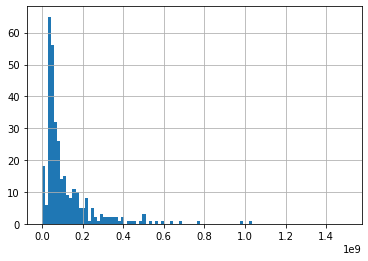

In [31]:
df['budget'].hist(bins=100, range =(0, 1500000000))

Большинство фильмов с господдержкой имеют бюджет до 200 млн. руб.

Text(0, 0.5, 'Число фильмов')

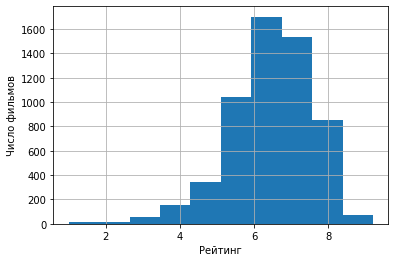

In [32]:
df['ratings'].hist()
plt.xlabel('Рейтинг')
plt.ylabel('Число фильмов')

Преобладают фильмы с рейтингом от 5.5 до 7.

Text(0, 0.5, 'Число фильмов')

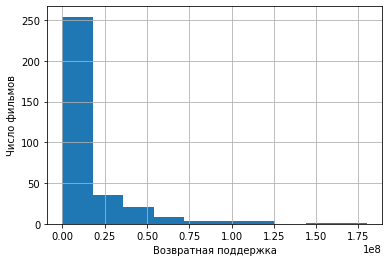

In [33]:
df['refundable_support'].hist()
plt.xlabel('Возвратная поддержка')
plt.ylabel('Число фильмов')

Text(0, 0.5, 'Число фильмов')

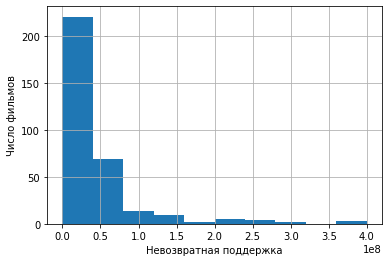

In [34]:
df['nonrefundable_support'].hist()
plt.xlabel('Невозвратная поддержка')
plt.ylabel('Число фильмов')

Расределения для `refundable_support`, `nonrefundable_support ` похожи, но значения `nonrefundable_support ` больше.

In [35]:
df['refundable_support'].value_counts().head()

0.0           220
20000000.0     12
10000000.0     10
25000000.0     10
15000000.0      9
Name: refundable_support, dtype: int64

In [36]:
df['nonrefundable_support'].value_counts().head()

25000000.0    53
30000000.0    47
35000000.0    29
40000000.0    26
20000000.0    18
Name: nonrefundable_support, dtype: int64

Посмотрим на зависимость бюджета и поддержки:

Text(0, 0.5, 'Возвратная поддержка')

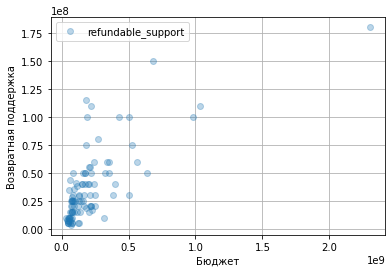

In [37]:
(
    df.query('(budget != 0) and (refundable_support != 0)')
    .plot(x='budget', y='refundable_support', style='o', grid=True, alpha=0.3)
)    
plt.xlabel('Бюджет')
plt.ylabel('Возвратная поддержка')

Text(0, 0.5, 'Невозвратная поддержка')

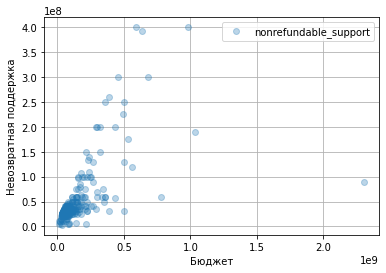

In [38]:
(
    df.query('(budget != 0) and (nonrefundable_support != 0)')
    .plot(x='budget', y='nonrefundable_support', style='o', grid=True, alpha=0.3)
) 
plt.xlabel('Бюджет')
plt.ylabel('Невозвратная поддержка')

In [39]:
df['budget'].corr(df['nonrefundable_support']) 

0.5624227643779858

In [40]:
df['budget'].corr(df['refundable_support']) 

0.6241052610133675

In [41]:
df['budget'].corr(df['refundable_support'] + df['nonrefundable_support']) 

0.6877784346118256

Строим график, отфильтровывая нулевые значения. Видим  зависимость, коэффициент Пирсона равен 0.6, что подтвержает тесную связь бюджета c `refundable_support`и `nonrefundable_support`.

Cтолбец `budget` уже включает в себя полный объём государственной поддержки. Проверим, нет ли таких фильмов, для которых бюджет оказался меньше суммарной поддержки:

In [42]:
df['check_budget'] = df['budget'] - (df['refundable_support'] + df['nonrefundable_support'])
df.query('check_budget < 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,check_budget
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ооо киностудия ""сентябрь""",Россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,-23000000.0
2058,дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",Россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08,-75000000.0
2472,воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",Россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,-80000000.0
2532,бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,-20000000.0
2615,савва. сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",Россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,-160000000.0
2684,тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ооо ""кинокомпания ""коктебель""",Россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,-59000000.0
2788,срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,-35000000.0
2874,помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ооо ""кинофирма""",Россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07,-6000000.0
3047,любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",Россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,-70000000.0
3565,притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",Россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09,-250000000.0


Получили 17 таких строк, где бюджет равен нулю, скорее всего 
это ошибка в данных, и тк бюджет должен включать полную сумму поддержки, преобразуем эти значения соответвующим образом:

In [43]:
df.loc[df['check_budget'] < 0, 'budget'] = df['refundable_support'] + df['nonrefundable_support']

### Добавление новых столбцов





- Создаем столбец с информацией о годе проката и выделяем год из даты премьеры фильма.

In [44]:
df['show_start_year'] = df['show_start_date'].dt.year
df['show_start_year'].head(3)

0    2015
1    2016
2    2016
Name: show_start_year, dtype: int64

- Создаем два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [45]:
def main_value(cell):               #  создаем функцию, выделяющую основное значение из ячейки
    main = cell.split(',')
    return main[0]

def main_value1(cell):               #  заодно для удобства укоротим значения в age_restriction
    main = cell.split(' -')
    return main[0]

df['main_director'] = df['director'].apply(main_value)
print(df['main_director'].unique())
df['main_genre'] = df['genres'].apply(main_value)
print(df['main_genre'].unique())
df['age_restriction'] = df['age_restriction'].apply(main_value1)
print(df['age_restriction'].unique())

['кевин костнер' 'е.матвеев' 'тимур бекмамбетов' ... 'ник пауэлл'
 'а.беляев' 'и.трусов']
['боевик' 'драма' 'фантастика' 'мелодрама' 'мюзикл' 'комедия' 'триллер'
 'ужасы' 'мультфильм' 'unknown' 'военный' 'документальный' 'фэнтези'
 'криминал' 'приключения' 'аниме' 'детектив' 'для взрослых' 'семейный'
 'концерт' 'история' 'короткометражка' 'детский' 'спорт' 'биография'
 'вестерн' 'музыка' 'фильм-нуар' 'реальное ТВ']
['«18+»' '«6+»' '«12+»' '«16+»' '«0+»']


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Создадим отдельный датафрейм для фильмов с господдержкой:

In [46]:
df['full_support'] = df['refundable_support'] + df['nonrefundable_support']
df['support_ratio'] = df['full_support'] / df['budget']
df['support_ratio'].median()

0.6153846153846154

Text(0, 0.5, 'Число фильмов')

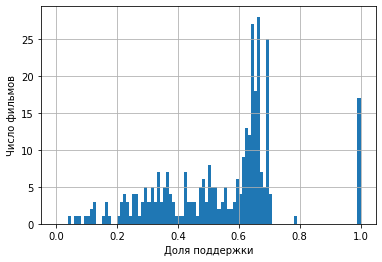

In [47]:
df['support_ratio'].hist(bins=100, range=(0, 1))
plt.xlabel('Доля поддержки')
plt.ylabel('Число фильмов')

Можно сделать вывод, что у большиства фильмов господдержка составляет 60-70%, но есть также и фильмы со 100% поддержкой.

### Шаг 3. Исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обращаем внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Text(0, 0.5, 'Число фильмов')

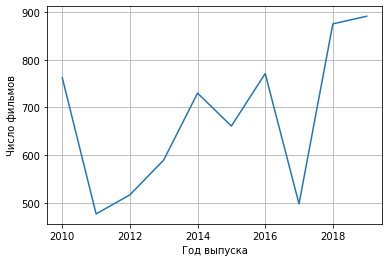

In [48]:
(
    df.groupby('show_start_year')['title'].count()
    .plot(grid=True)
)    
plt.xlabel('Год выпуска')
plt.ylabel('Число фильмов')

На графике можем увидеть, что больше всего фильмов выходило в 2010 году,  меньше всего - в 2013 и 2017 годах.

Теперь посмотрим, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах:

In [49]:
df['box_office_na'] = df['box_office'].isna()
df['box_office_na'].mean()

0.5544890726520969

Более чем для половины всех фильмов неизвестна сумма сборов. Изучим, как эта доля менялась по годам:

Text(0, 0.5, 'Доля неизвестных данных')

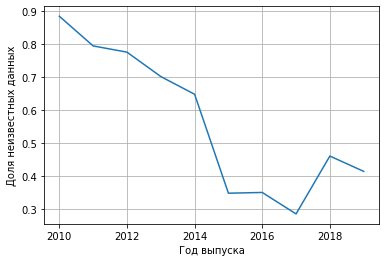

In [50]:
df.groupby('show_start_year')['box_office_na'].mean().plot(grid=True)
plt.xlabel('Год выпуска')
plt.ylabel('Доля неизвестных данных')

Как видно из графика, в период с 2010 по 2014 год отсутствующие данные составляли большую часть - 65-90%.
Начиная же с 2015 года, данные становятся более полными - отсутствуют не более 35% данных о сборах.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Text(0, 0.5, 'Сборы')

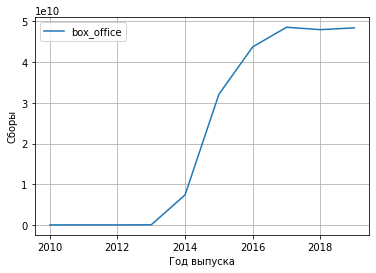

In [51]:
(
    df.pivot_table(columns='show_start_year', values='box_office', aggfunc='sum')
    .transpose().plot(grid=True)
)
plt.xlabel('Год выпуска')
plt.ylabel('Сборы')

Из графика видим, что наименьшие суммы сборов были в период с 2010 до 2013 год - однако, скорее всего это связано в выявленной выше неполнотой и аномалиями в данных за этот промежуток времени.

Резкий рост видим с 2014 до 2016 года, далее после 2017 сумма сборов практически не меняется.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

Text(0, 0.5, 'Сборы')

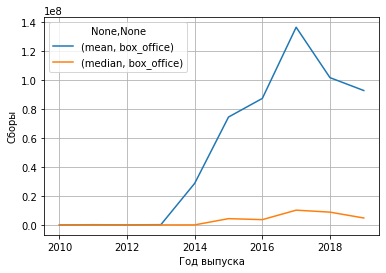

In [52]:
df.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = ['mean','median']).plot(grid=True)
plt.xlabel('Год выпуска')
plt.ylabel('Сборы')

Как видим, среднее и медиана сильно различаются, что говорит о сильном разбросе в значениях - есть кассовые фильмы, а есть те, которые собрали совсем небольшие суммы.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

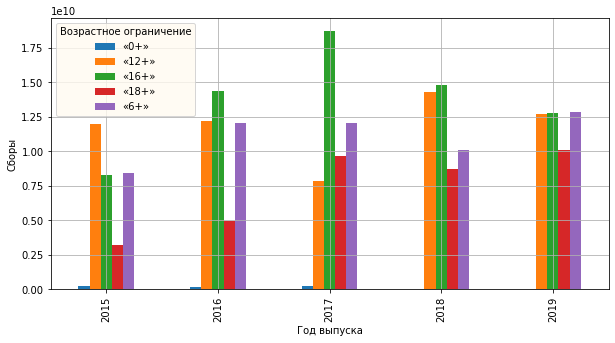

In [53]:
(
    df.query('show_start_year >= 2015')
    .pivot_table(index = 'age_restriction', columns='show_start_year', values='box_office', aggfunc='sum')
    .transpose().plot(kind='bar', grid=True, figsize = (10,5))
)
plt.xlabel('Год выпуска')
plt.ylabel('Сборы')
plt.legend(title = 'Возрастное ограничение', facecolor = 'floralwhite')

Как видно из графика, практически всегда самые большие сборы были у фильмов с категорией 16+, за исключением 2015 года - здесь впереди категория 12+, и 2019 года - самой кассовой оказалась категория 6+. Это может быть связано с тем, что эти категории охватывают самую большую группу людей - такие фильмы подходят и для подростков и для взрослых. Возможно, в этих годах выходило больше фильмов с таким возрастным ограничением. В категории 0+ выходит совсем немного фильмов, поэтому и суммарные сборы соотвественно небольшие.

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Проверим следующее:
- влияние господдержки на рейтинг фильма;
- влияние господдержки на окупаемость фильма;
- зависимость окупаемости от источника финансирования;
- посморим, какие жанры фильмов получили больше всего средств.

Text(0, 0.5, 'Число фильмов')

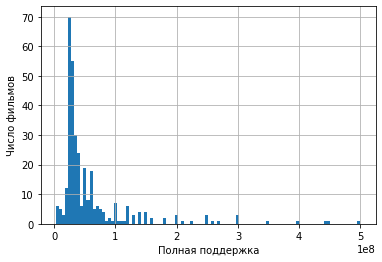

In [54]:
df['full_support'].hist(bins=100)
plt.xlabel('Полная поддержка')
plt.ylabel('Число фильмов')

На съемку фильмов выделяются значительные средства - до 100 млн руб!
Посмотрим, насколько доля господдержки влияет на рейтинг фильма:

Text(0, 0.5, 'Поддержка')

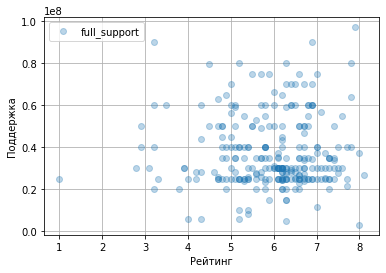

In [55]:
(
    df.query('full_support < 100000000')
    .plot(x='ratings', y='full_support', style='o', grid=True, alpha=0.3)
)    
plt.xlabel('Рейтинг')
plt.ylabel('Поддержка')

In [56]:
df['full_support'].corr(df['ratings'])

0.13332497072074986

Нельзя сказать, что господдержка и рейтинг связаны - на диаграмме большинство точек сосредоточены в облати рейтинга от 6 до 7, вместе с тем уровень поддержки сравнительно невысок. Коэффициент Пирсона, равный 0.13, подтверждает практически полное отсутствие связи между этими величинами.

Найдем окупаемость, для этого вычитаем из сборов бюджет фильма:

In [57]:
df['payback'] = df['box_office'] - df['budget']

Посмотрим, как связаны окупаемость и сумма господдержки:

Text(0, 0.5, 'Окупаемость')

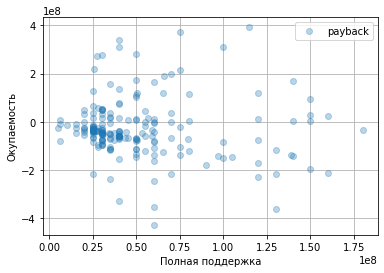

In [58]:
(
   df.query('(full_support >= 0) and (full_support < 200000000)  and (payback < 500000000) and (payback > -500000000) and (box_office > 1000000) and (show_start_year > 2014)')
    .plot(x='full_support', y='payback', style='o', grid=True, alpha=0.3)
)    
plt.xlabel('Полная поддержка')
plt.ylabel('Окупаемость')

До значений поддержки в 50 млн видим слабую обратную зависимость, далее точки сильно разбросаны - возможно влияние других факторов.

In [59]:
df.query('show_start_year >= 2015')['full_support'].corr(df['payback'])

0.10027538124076593

Фильтруем по годам, тк начиная с 2015 года, данные представлены наиболее полно. Получаем очень малый коэффициент Пирсона 0.1, что говорит об отсутствии линейной связи между господдержкой и окупаемостью - скорее всего, связь имеет более сложный характер. 

Построим гистограмму для окупаемости, взяв только фильмы со сборами больше 1 млн:

Text(0, 0.5, 'Число фильмов')

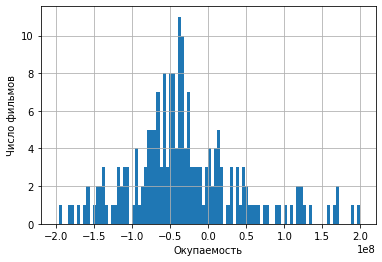

In [60]:
df.query('box_office >= 1000000')['payback'].hist(bins=100, range=(-200000000, 200000000))
plt.xlabel('Окупаемость')
plt.ylabel('Число фильмов')

Как видно из гистограммы, большинство фильмов с господдержкой из нашего датасета не окупились и имеют убытки от 20 до 100 млн.руб., однако стоит учитывать найденные ранее аномалии в данных - слишком малые значения в ячейке сборов. 

Теперь построим график зависимости окупаемости от источника финансирования:

Text(0, 0.5, 'Источник финансирования')

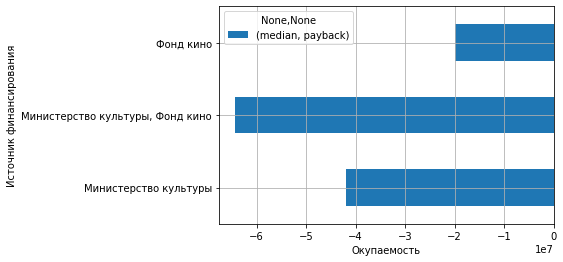

In [61]:
(
    df.query('box_office >= 1000000')
    .pivot_table(index='financing_source', values='payback', aggfunc = ['median'])
    .plot(kind='barh', grid=True)
) 
plt.xlabel('Окупаемость')
plt.ylabel('Источник финансирования')

Хуже всего обстоят дела с окупаемостью у фильмов, финансируемых и Министерством культуры и Фондом кино - до 60 млн убытков по медиане. Лучше всего - у фильмов Фонда кино, хоть окупаемость и отрицательная по медиане.

Сравним данные по источникам финансирования — откуда поступает больше средств, из каких источников поступает больше невозвратных средств:

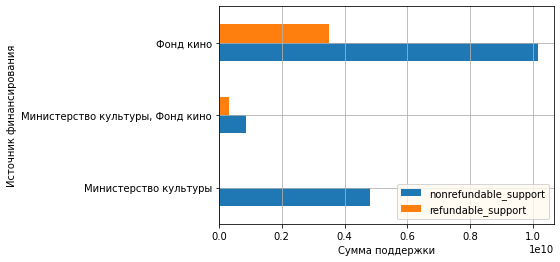

In [62]:
(
    df.query('financing_source != "unknown"')
    .pivot_table(columns='financing_source', values=['refundable_support', 'nonrefundable_support'], aggfunc='sum')
    .transpose().plot(kind='barh', grid=True)
)
plt.xlabel('Cумма поддержки')
plt.ylabel('Источник финансирования')
plt.legend(facecolor = 'floralwhite')

Больше всего средств - суммарных и возвратных -  поступает из Фонда кино, наименьшая суммарная поддержка - у фильмов с двумя источниками финансирования, и наконец поддержка от Министерства культуры полностью невозвратна.

Здесь уже прослеживается связь с окупаемостью - у Фонда кино самая большая доля возвратных средств и самые лучшие показатели по окупаемости.


Посмотрим, какие жанры фильмов получили больше всего средств, для этого сначала выделим наиболее часто встречающиеся жанры:

In [63]:
df.query('full_support >= 0')['main_genre'].value_counts()

драма          92
комедия        74
мультфильм     31
unknown        16
мелодрама      15
триллер        15
фантастика     10
фэнтези        10
ужасы          10
военный         9
семейный        7
приключения     7
боевик          6
детектив        5
история         4
мюзикл          4
детский         4
биография       3
криминал        3
спорт           3
реальное ТВ     1
Name: main_genre, dtype: int64

Такие жанры - драма, комедия, мультфильм, триллер, мелодрама, фэнтези, фантастика, ужасы, военный. Исключим фильмы с неизвестным жанром unknown и создадим отдельный список с этими жанрами.

In [64]:
film_list = ['драма', 'комедия', 'мультфильм', 'триллер', 'мелодрама', 'фэнтези', 'фантастика', 'ужасы', 'военный']

Text(0, 0.5, 'Полная поддержка')

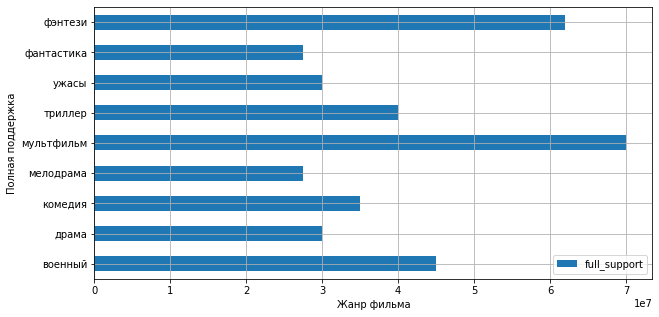

In [65]:
(
   df.query('main_genre in @film_list')
    .pivot_table(index='main_genre', values='full_support', aggfunc='median')
    .plot(kind='barh', grid=True, figsize=(10,5))
) 
plt.xlabel('Жанр фильма')
plt.ylabel('Полная поддержка')


Больше всего средств выделяется на мультфильмы, меньше всего - на драмы, мелодрамы и фантастику. Теперь посмотрим, какие жанры имеют наибольший и наименьший рейтинг:

Text(0, 0.5, 'Рейтинг')

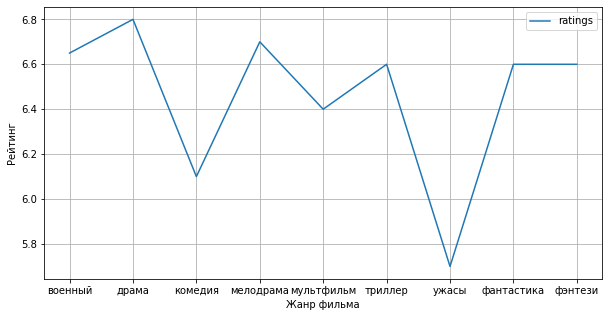

In [66]:
(
     df.query('main_genre in @film_list')
    .pivot_table(index='main_genre', values='ratings', aggfunc='median')
    .plot(grid=True, figsize=(10,5))
) 
plt.xlabel('Жанр фильма')
plt.ylabel('Рейтинг')


Несмотря на то, что на мультфильмы выделяется больше средств, чем на драму, фантастику и фэнтези, медианный рейтинг у них ниже, чем у этих жанров. Самые низкие рейтинги - у фильмов жанра ужасов, этот жанр только недавно появился в российском кино.

Составим аналогичные  графики для режиссёров:

In [67]:
df.query('full_support >= 0')['main_director'].value_counts().head(15)

р.давлетьяров    5
с.андреасян      4
д.дьяченко       4
с.мокрицкий      3
н.хомерики       3
д.шмидт          3
к.шипенко        3
а.котт           3
а.цицилин        3
а.аксененко      3
а.матисон        2
к.дружинин       2
т.бекмамбетов    2
п.лунгин         2
а.войтинский     2
Name: main_director, dtype: int64

In [68]:
dir_list = ['р.давлетьяров', 'с.андреасян', 'д.дьяченко', 'а.котт', 'а.аксененко', 'а.цицилин', 'с.мокрицкий', 'д.шмидт', 'к.шипенко']

Text(0, 0.5, 'Полная поддержка')

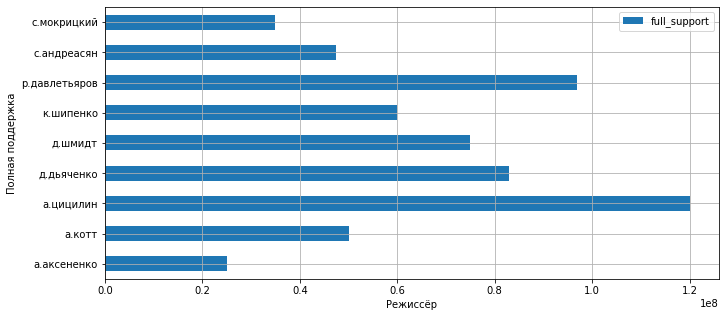

In [69]:
(
   df.query('main_director in @dir_list')
    .pivot_table(index='main_director', values='full_support', aggfunc='median')
    .plot(kind='barh',grid=True, figsize=(11,5))
) 
plt.xlabel('Режиссёр')
plt.ylabel('Полная поддержка')


Больше всего средств из бюджета получают режиссёры Алексей Цицилин и Ренат Давлетьяров.

Text(0, 0.5, 'Рейтинг')

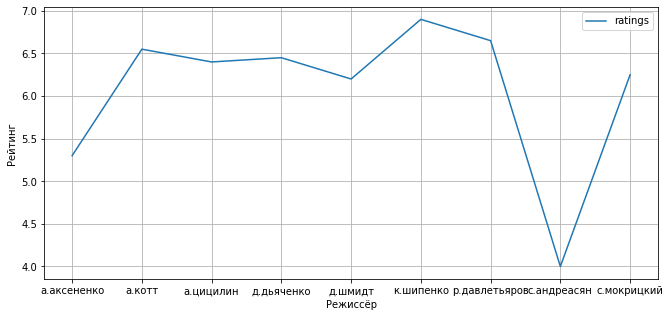

In [70]:
(
   df.query('main_director in @dir_list')
    .pivot_table(index='main_director', values='ratings', aggfunc='median')
    .plot(grid=True, figsize=(11,5))
) 
plt.xlabel('Режиссёр')
plt.ylabel('Рейтинг')


Как видим из графиков, несмотря на то, что режиссёры Александр Котт и Клим Шипенко получают сравнительно небольшую поддержку от государства,  медианный рейтинг у их фильмов выше чем у Цицилина и Давлетьярова. Самые низкие рейтинги ~~ожидаемо~~ у фильмов Сарика Андреасяна.

Посмотрим, сколько всего средств из бюджета было выделено по годам:

Text(0, 0.5, 'Сумма поддержки')

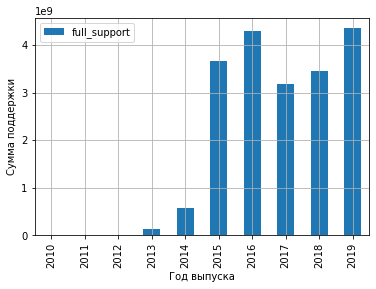

In [71]:
(
    df.pivot_table(columns='show_start_year', values='full_support', aggfunc='sum')
    .transpose().plot(kind='bar', grid=True)
)
plt.xlabel('Год выпуска')
plt.ylabel('Сумма поддержки')

Наибольший объем средств был выделен в 2016 и 2019 годах, наименьший - 2017. Значения за 13 и 14 год врядли можно считать корректными, тк за эти года данные о прокате представлены наименее полно.

Рассмотрим зависимость поддержки от возрастной категории фильмов:

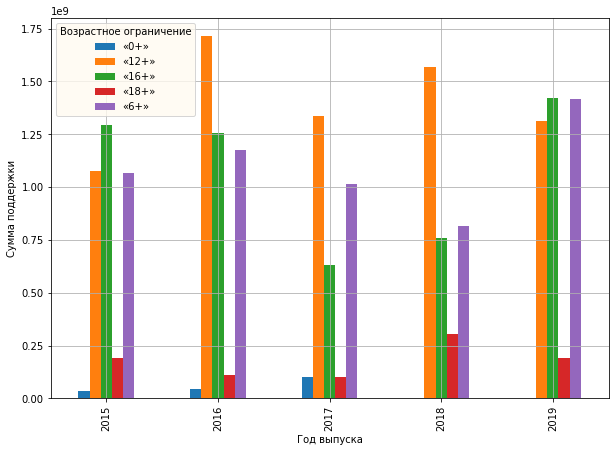

In [72]:
(
    df.query('(show_start_year >= 2015) and (full_support >= 0)')
    .pivot_table(index = 'age_restriction', columns='show_start_year', values='full_support', aggfunc='sum')
    .transpose().plot(kind='bar', grid=True, figsize=(10, 7))
)
plt.xlabel('Год выпуска')
plt.ylabel('Сумма поддержки')
plt.legend(title = 'Возрастное ограничение', facecolor = 'floralwhite')

Больше всего средств выделяется на фильмы категории 12+, за исключением 2015 и 2019 годов - здесь впереди категории 16+.

## Общий вывод

По итогам исследовательского анализа данных можно сделать следующие выводы:
- больше всего фильмов выходило в 2010 году,  меньше всего - в 2017 году.
- общая доля фильмов с указанной информацией о сборах в кинотеатрах составляет 55% из них в период с 2010 по 2014 год отсутствующие данные составляли большую часть - 65-90%. Начиная же с 2015 года, данные становятся более полными - отсутствуют не более 35% данных о сборах.
- наименьшие суммы сборов были в период с 2010 до 2013 год - скорее всего, это связано в выявленной выше неполнотой данных за этот промежуток времени. Резкий рост видим с 2014 до 2016 года, далее после 2017 сумма сборов практически не меняется.
- с 2015 по 2019 год практически всегда самые большие сборы были у фильмов с категорией 16+, за исключением 2015 года - здесь впереди категория 12+, и 2019 года - самой кассовой оказалась категория 6+


По итогам исследования фильмов, получивших господдержку:
- Напрямую сумма господдержки не влияет на рейтинг - встречаются как фильмы с высоким рейтингом и минимальной поддержкой, так и наоборот;
- большинство фильмов с господдержкой из нашего датасета не окупились и имеют убытки от 20 до 100 млн.руб., однако стоит учитывать найденные ранее аномалии в данных - слишком малые значения в ячейке сборов. Для более точного анализа необхожимо уточнение от источника;
- Больше всего средств - суммарных и возвратных - поступает из Фонда кино, наименьшая суммарная поддержка - у фильмов с двумя источниками финансирования, и наконец поддержка от Министерства культуры полностью невозвратна.
Здесь уже прослеживается связь с окупаемостью - у Фонда кино самая большая доля возвратных средств и самые лучшие показатели по окупаемости. Возможно, Министерству культуры также стоит увеличить долю возвратной поддержки - это простимулирует на выпуск более качественного продукта;
- Больше всего средств выделяется на мультфильмы, меньше всего - на драмы, мелодрамы и фантастику, но при этом медианный рейтинг у них ниже, чем у этих жанров. Самые низкие рейтинги - у фильмов жанра ужасов.
- Больше всего средств из бюджета получают режиссёры Алексей Цицилин и Ренат Давлетьяров. Режиссёры Александр Котт и Клим Шипенко получают сравнительно небольшую поддержку от государства, но медианный рейтинг у их фильмов выше чем у Цицилина и Давлетьярова. Самые низкие рейтинги у фильмов Сарика Андреасяна.
- С 2015 до 2019 год больше всего средств было выделено на фильмы категории 12+, за исключением 2015 и 2019 годов - здесь впереди категория 16+. При этом в общем по базе самымой прибыльной является категория 16+ - возможно, стоит уделить больше внимания финансированию фильмов этой категории.